<a href="https://colab.research.google.com/github/mohamedElnafad/ML-project/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Laibararies 

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Loading and processing dataset

In [25]:
gold_data = pd.read_csv('/content/gld_price_data.csv')

gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [26]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Get corroletion between the data

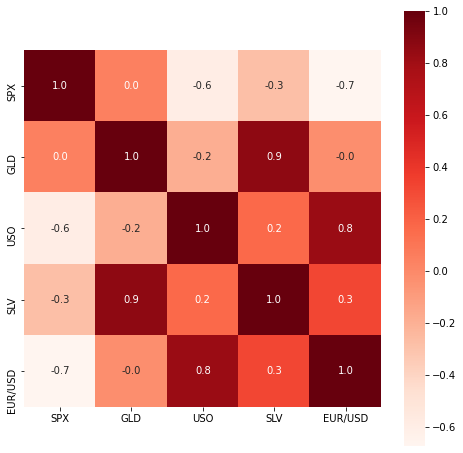

In [27]:
correlation = gold_data.corr()
plt.figure(figsize=[8,8])
sns.heatmap(correlation, annot=True, fmt='.1f', square=True, cmap='Reds')

In [29]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


Split data to features and label

In [50]:
x = gold_data.drop(['Date', 'GLD'], axis=1)
y = gold_data['GLD']

#splitting data to train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 2)

#train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100)

model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
prediction = model.predict(x_train)
print(prediction)

[109.93759804 114.68880082  90.59329999 ... 130.45869646 159.89109563
 115.02939937]


In [58]:
#Compare between actual data and prediction
prediction= model.predict(x_train)
score = metrics.r2_score(y_train, prediction)
print('score for training data ', score)

score for training data  0.9984253612629448


In [47]:
#calculate Mean Square error
mse = metrics.mean_squared_error(y_train, prediction)
print(mse)

0.8173723744635603


In [59]:
test_prediction = model.predict(x_test)
score = metrics.r2_score(y_test, test_prediction)
print('score for testing data ', score)

score for testing data  0.9892962683600708


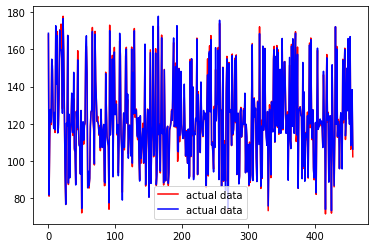

In [64]:
y_test = list(y_test)
plt.plot(y_test, color='red', label='actual data')
plt.plot(test_prediction, color='blue', label='actual data')
plt.legend()